# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
import pandas as pd
import cv2 

import os
import numpy as np

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

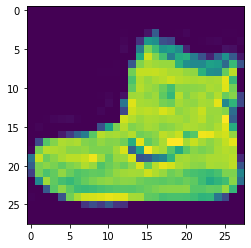

In [32]:
train=pd.read_csv("D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\train.csv")
test=pd.read_csv("D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\test.csv")

train_image_path="D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\train\\"

##Loading Training Images
train_img=[]
for i in train['id']:
    img=cv2.imread(os.path.join(train_image_path,str(i)+'.png'),0)
    train_img.append(img)
    

plt.imshow(train_img[0])
plt.show()

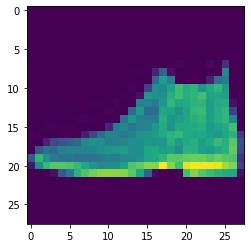

In [33]:
test_image_path="D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\test\\"

##Loading Testing Images
test_img=[]
for i in test['id']:
    img=cv2.imread(os.path.join(test_image_path,str(i)+'.png'),0)
    test_img.append(img)

plt.imshow(test_img[0])

In [34]:
train_label = train['label']

In [35]:
X_train = np.array(train_img)
X_test_sub = np.array(test_img)

In [36]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test_sub = X_test_sub.reshape((X_test_sub.shape[0], -1))

In [37]:
# use only 33% of training data to expedite the training process
X_train_, x_test_ , y_train, y_test = train_test_split(X_train, train_label, test_size = 0.67, random_state = 7)

In [24]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)

(19800, 784) (40200, 784) (19800, 10) (40200, 10)


In [26]:
X_test_sub.shape

(10000, 784)

In [23]:
#Before
#y_train.unique()

array([7, 6, 9, 0, 5, 4, 1, 8, 3, 2], dtype=int64)

In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [40]:
type(y_train)

pandas.core.series.Series

In [41]:
type(to_categorical(y_train))

numpy.ndarray

## Basic MLP model
- Naive MLP model without any alterations

In [100]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [125]:
model = Sequential()

In [126]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [127]:
sgd = optimizers.SGD(lr = 0.01, momentum=0.8)
sgd_NM = optimizers.SGD(lr = 0.01, momentum=0.8, nesterov=True)
model.compile(optimizer = sgd_NM, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [128]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 150
                    , verbose = 0)

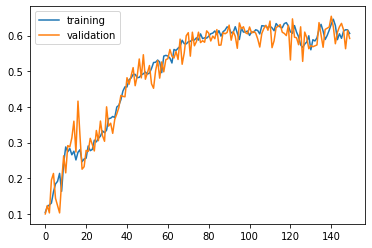

In [129]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [130]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 1s 997us/step - loss: 1.0084 - accuracy: 0.5984


In [131]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5983582139015198


#### momentum = 0.5 -> 0.40 Acc
#### momentum = 0.8 -> 0.48 Acc
#### momentum = 1.0 -> 0.28 Acc

#### optimizers.SGD(lr = 0.01, momentum=0.8) ---> 0.6803731322288513

#### sgd_NM = optimizers.SGD(lr = 0.01, momentum=0.8, nesterov=True) ---> Test accuracy:  0.63092041015625

#### sgd_NM = optimizers.SGD(lr = 0.01, momentum=0.8, nesterov=True), Ep:150---> Test accuracy: 0.5983582139015198

In [123]:
# from now on, create a function to generate (return) models
def mlp_model_tune_Dense(denseCount):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [124]:
for i in [30,50,60,64,70]:

    model = mlp_model_tune_Dense(i)
    history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)
    results = model.evaluate(x_test, y_test)
    print('Test accuracy for dense:', i,' is', results[1])

1257/1257 [==============================] - 1s 849us/step - loss: 2.1324 - accuracy: 0.2100
Test accuracy for dense: 30  is 0.20999999344348907
1257/1257 [==============================] - 1s 901us/step - loss: 2.1962 - accuracy: 0.3139
Test accuracy for dense: 50  is 0.3139054775238037
1257/1257 [==============================] - 1s 911us/step - loss: 2.0929 - accuracy: 0.2750
Test accuracy for dense: 60  is 0.27497512102127075
1257/1257 [==============================] - 1s 882us/step - loss: 2.2688 - accuracy: 0.4019
Test accuracy for dense: 64  is 0.4018656611442566
1257/1257 [==============================] - 1s 879us/step - loss: 2.2617 - accuracy: 0.4080
Test accuracy for dense: 70  is 0.4080348312854767


## 1. Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [132]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [134]:


    model = mlp_model()
    history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)
    results = model.evaluate(x_test, y_test)
    print('Test accuracy:', results[1])

1257/1257 [==============================] - 1s 869us/step - loss: 1.8659 - accuracy: 0.4327
Test accuracy: 0.43266168236732483


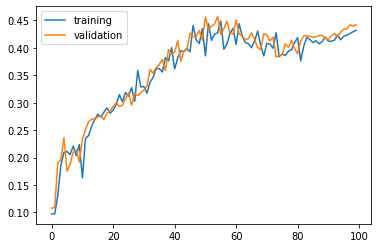

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [136]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 1s 857us/step - loss: 1.8659 - accuracy: 0.4327


In [137]:
print('Test accuracy: ', results[1])

Test accuracy:  0.43266168236732483


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>
<img src="https://www.researchgate.net/profile/Sepp_Hochreiter/publication/284579051/figure/fig1/AS:614057178578955@1523414048184/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs.png" style="width: 400px"/>
<center> **Comparision of activation** </center>

In [206]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('hard_sigmoid'))    # use relu
    model.add(Dense(50))
    model.add(Activation('hard_sigmoid'))    # use relu
    model.add(Dense(50))
    model.add(Activation('hard_sigmoid'))    # use relu
    model.add(Dense(50))
    model.add(Activation('hard_sigmoid'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd_NM = optimizers.SGD(lr = 0.01, momentum=0.8, nesterov=True)
    adam001 = optimizers.Adam(lr = 0.001)
    adam01 = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam001, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [207]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 200, validation_split = 0.2, epochs = 150, verbose = 0)

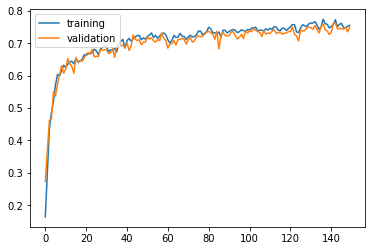

In [208]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [209]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 1s 1ms/step - loss: 0.6568 - accuracy: 0.7592


In [210]:
print('Test accuracy: ', results[1])

Test accuracy:  0.759154200553894


#### Elu Lr 0.001 SGD ----> Acc .77

#### Elu SGD(lr = 0.01) ----> loss: nan - accuracy: 0.1005
#### Sigmoid sgd_NM = optimizers.SGD(lr = 0.01, momentum=0.8, nesterov=True) and batch_size = 256, validation_split = 0.2, epochs = 150 ----> loss: 0.8053 - accuracy: 0.7177

#### tanh - 0.6577114462852478

#### softsign - 0.7170398235321045 - Validation & training are same - Good Generalized model.

#### hard_sigmoid - 0.667935311794281 - Validation & training are same - Good Generalized model.
#### adam001 - 0.7701243758201599
#### adam01 - 0.2915174067020416

## Learning rate 0.01 without momentum is giving very bad result
## Elu is giving very bad result

In [169]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})
#Out
Out.to_csv('MNIST_App_Pred_Sig_LR_0_01_SGDM.csv', header =  ['id', 'label' ], index = None)

In [30]:
import numpy as np
import pandas as pd

In [31]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Elu_SGD.csv', header =  ['filename', 'label' ], index = None)

## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [211]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('hard_sigmoid'))  
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [212]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 200, validation_split = 0.2, epochs = 150, verbose = 0)

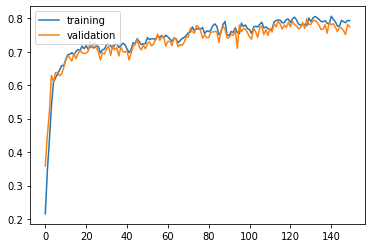

In [213]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [214]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 1s 877us/step - loss: 0.5958 - accuracy: 0.7872


In [215]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7871641516685486


In [37]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Elu_adam.csv', header =  ['filename', 'label' ], index = None)

## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [120]:
from keras.layers import BatchNormalization

In [141]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [142]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.4, epochs = 100, verbose = 0)

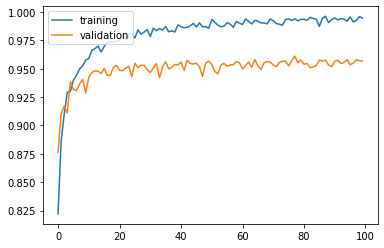

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [144]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 919us/step - loss: 0.2381 - accuracy: 0.95870s - loss: 0.2


In [145]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9586963057518005


In [146]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_LR_0_1_Adam.csv', header =  ['filename', 'label' ], index = None)

## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [63]:
from keras.layers import Dropout

In [64]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [65]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

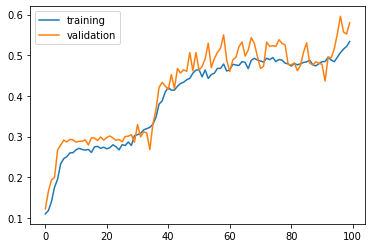

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [67]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 797us/step - loss: 1.1125 - accuracy: 0.5871


In [68]:
print('Test accuracy: ', results[1])

Test accuracy:  0.587115466594696


In [69]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_DropOut.csv', header =  ['filename', 'label' ], index = None)

## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [91]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [93]:
def mlp_model1():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model2():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model3():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [94]:
model1 = KerasClassifier(build_fn = mlp_model1, epochs = 30, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model2, epochs = 10, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model3, epochs = 20, verbose = 0)

In [95]:
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [96]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [97]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B19C8>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B1748>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B1788>)],
                 voting='soft')

In [98]:
y_pred = ensemble_clf.predict(x_test)

In [99]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.9627474870545233


In [100]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Ensemble.csv', header =  ['filename', 'label' ], index = None)

## Tuning by Learning rate & decaying rate

In [189]:
# solution
epochs = 100
learning_rate = 0.01 # initial learning rate
decay_rate = 0.01
momentum = 0.8

# define the optimizer function
adam = optimizers.Adam(lr=learning_rate)

In [214]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model_initial():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))  
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [215]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

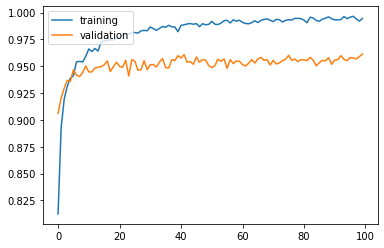

In [216]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [217]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 938us/step - loss: 0.2085 - accuracy: 0.9630


In [218]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9630216360092163


In [219]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_LR_0_1_Adam.csv', header =  ['filename', 'label' ], index = None)

#### With Elu & batch - Test accuracy:  0.963965892791748 - AV Accu - 96.7

#### With Elu, batch & Initializer - Test accuracy:  0.9626560807228088 - AV Accu - 96.5